In [32]:
import pandas as pd
import re

In [33]:
"""
Test parameters

input: 64 engineered features extracted from lidc max-slice images

model layer sizes = (64, 32, 32, 2)
groupdro_eta = 0.1
lr = 0.001
weight_decay = 0.005

batch_size = 40
proportional = True
epochs = 40
N = 120

"""

'\nTest parameters\n\ninput: 64 engineered features extracted from lidc max-slice images\n\nmodel layer sizes = (64, 32, 32, 2)\ngroupdro_eta = 0.1\nlr = 0.001\nweight_decay = 0.005\n\nbatch_size = 40\nproportional = True\nepochs = 40\nN = 120\n\n'

In [34]:
results = pd.read_csv("../results").iloc[:, 1:].transpose()
results.columns = ["ERM", "GDRO"]

In [35]:
results

,ERM,GDRO
0,"(0.8681318681318682, array([0.87857143, 0.8571...","(0.8571428571428571, array([0.85714286, 0.7857..."
1,"(0.8608058608058609, array([0.9 , 0.9285...","(0.8351648351648352, array([0.82857143, 0.9285..."
2,"(0.8791208791208791, array([0.89285714, 0.7142...","(0.8754578754578755, array([0.85 , 0.8571..."
3,"(0.8717948717948718, array([0.85714286, 0.8571...","(0.8571428571428571, array([0.82857143, 0.5714..."
4,"(0.8644688644688645, array([0.88571429, 0.7857...","(0.9010989010989011, array([0.88571429, 1. ..."
...,...,...
115,"(0.8315018315018315, array([0.84285714, 1. ...","(0.8571428571428571, array([0.89285714, 0.8571..."
116,"(0.8717948717948718, array([0.9 , 0.9285...","(0.8424908424908425, array([0.89285714, 0.7857..."
117,"(0.8241758241758241, array([0.85 , 0.7857...","(0.8608058608058609, array([0.90714286, 0.7857..."
118,"(0.8681318681318682, array([0.87857143, 0.9285...","(0.8937728937728938, array([0.91428571, 0.7857..."


In [36]:
split = [[[float(s) for s in re.sub("\(|\[|[a-z]| |\]|\)", "", v).split(",")] for v in row] for row in results.values]
split[0][0][0]

0.8681318681318682

In [37]:
data_clean = [pd.DataFrame([[val[group] for val in row] for row in split], columns=["ERM","GDRO"]) for group in range(5)]

<AxesSubplot:title={'center':'Overall Accuracy'}>

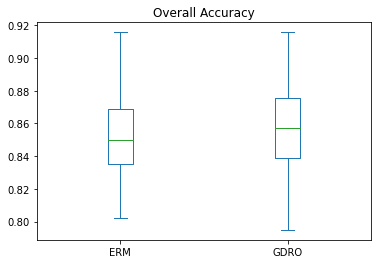

In [38]:
data_clean[0].plot(kind="box", title="Overall Accuracy")

<AxesSubplot:title={'center':'0benign'}>

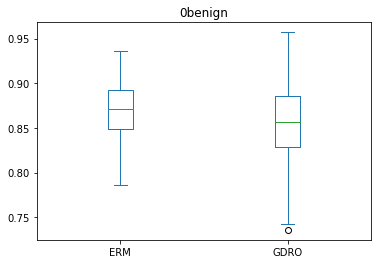

In [39]:
data_clean[1].plot(kind="box", title="0benign")

<AxesSubplot:title={'center':'1benign'}>

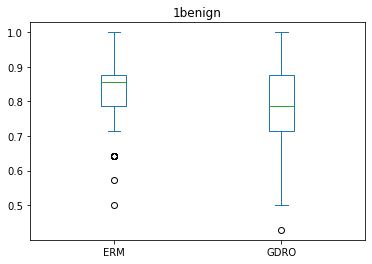

In [40]:
data_clean[2].plot(kind="box", title="1benign")

<AxesSubplot:title={'center':'0malignant'}>

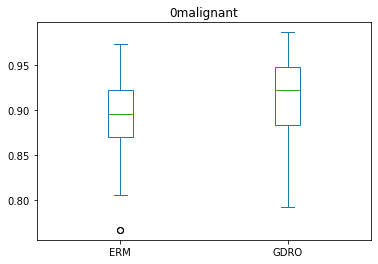

In [41]:
data_clean[3].plot(kind="box", title="0malignant")

<AxesSubplot:title={'center':'1malignant'}>

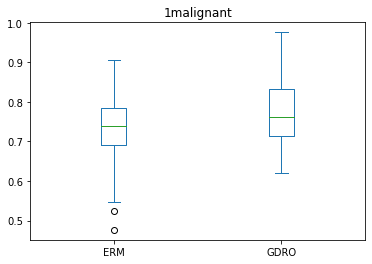

In [42]:
data_clean[4].plot(kind="box", title="1malignant")

In [43]:
from scipy.stats import ttest_ind
import statistics

group_names = ["Overall", "unmarked_benign", "marked_benign", "marked_malignant", "unmarked_malignant"]
for i in range(5):
    print(group_names[i])
    print(f"Mean ERM accuracy: {statistics.mean(data_clean[i]['ERM'])}")
    print(f"Mean GDRO accuracy: {statistics.mean(data_clean[i]['GDRO'])}")
    stat, p = ttest_ind(data_clean[i]["ERM"], data_clean[i]["GDRO"])
    if p < 0.05:
        print(f"{'ERM' if stat > 0 else 'GDRO'} higher accuracy (p = {p})")
    else:
        print(f"No statistically significant difference (p = {p})")
    print()
    

Overall
Mean ERM accuracy: 0.8525030525030525
Mean GDRO accuracy: 0.856043956043956
No statistically significant difference (p = 0.2721978496876005)

unmarked_benign
Mean ERM accuracy: 0.8694642854166666
Mean GDRO accuracy: 0.85517857125
ERM higher accuracy (p = 0.0029405430091068697)

marked_benign
Mean ERM accuracy: 0.8250000015
Mean GDRO accuracy: 0.7988095245
No statistically significant difference (p = 0.07291412033771862)

marked_malignant
Mean ERM accuracy: 0.8926406931666666
Mean GDRO accuracy: 0.91147186225
GDRO higher accuracy (p = 0.0006613591375991955)

unmarked_malignant
Mean ERM accuracy: 0.731547619
Mean GDRO accuracy: 0.7763888883333333
GDRO higher accuracy (p = 6.167920678258501e-06)



In [31]:
# old results with flawed malignancy labels + CNN subtypes
data_clean0

[          ERM      GDRO
 0    0.809211  0.812500
 1    0.822368  0.812500
 2    0.792763  0.812500
 3    0.792763  0.812500
 4    0.786184  0.809211
 ..        ...       ...
 115  0.812500  0.825658
 116  0.812500  0.786184
 117  0.809211  0.851974
 118  0.812500  0.786184
 119  0.805921  0.835526
 
 [120 rows x 2 columns],
           ERM      GDRO
 0    0.843750  0.864583
 1    0.833333  0.916667
 2    0.833333  0.770833
 3    0.968750  0.843750
 4    0.833333  0.760417
 ..        ...       ...
 115  0.895833  0.843750
 116  0.906250  0.791667
 117  0.916667  0.947917
 118  0.802083  0.864583
 119  0.864583  0.885417
 
 [120 rows x 2 columns],
           ERM      GDRO
 0    0.895833  0.864583
 1    0.854167  0.885417
 2    0.854167  0.864583
 3    0.875000  0.916667
 4    0.927083  0.854167
 ..        ...       ...
 115  0.875000  0.864583
 116  0.937500  0.791667
 117  0.875000  0.802083
 118  0.875000  0.781250
 119  0.906250  0.916667
 
 [120 rows x 2 columns],
          ERM     G